In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [3]:
dataset = pd.read_csv("laptop_data.csv")
df = dataset.copy()

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Data Pre-processing

In [9]:
# Are there any two duplicate rows
df.duplicated().sum()

0

In [10]:
# Are there any missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# Removing Unnamed: 0 column
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [12]:
# Ram is 'object' type due to word GB. We can pre-process and make Ram of integer type by removing GB in every row
# Similar for Weight
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")

In [13]:
df["Ram"] = df["Ram"].astype("int64")
df["Weight"] = df["Weight"].astype("float64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## Exploratory Data Analysis

In [16]:
import seaborn as sns

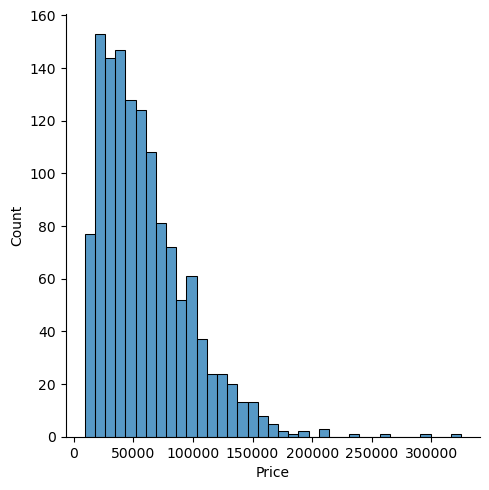

In [17]:
# to plot the distribution of the Price column
sns.displot(df["Price"])

<Axes: xlabel='Company'>

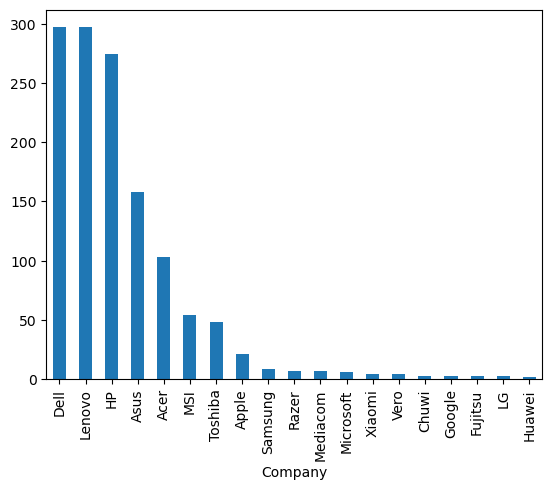

In [18]:
df["Company"].value_counts().plot(kind = "bar")

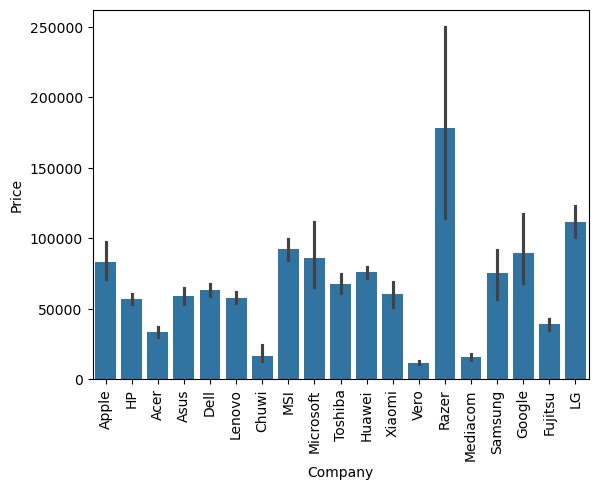

In [19]:
sns.barplot(x = df["Company"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='TypeName'>

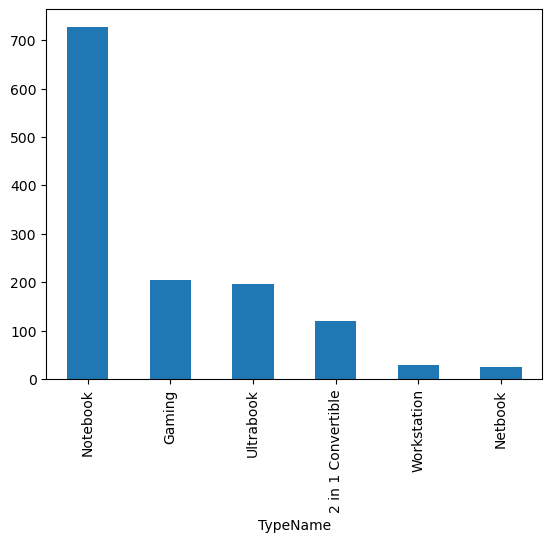

In [20]:
df["TypeName"].value_counts().plot(kind = "bar")

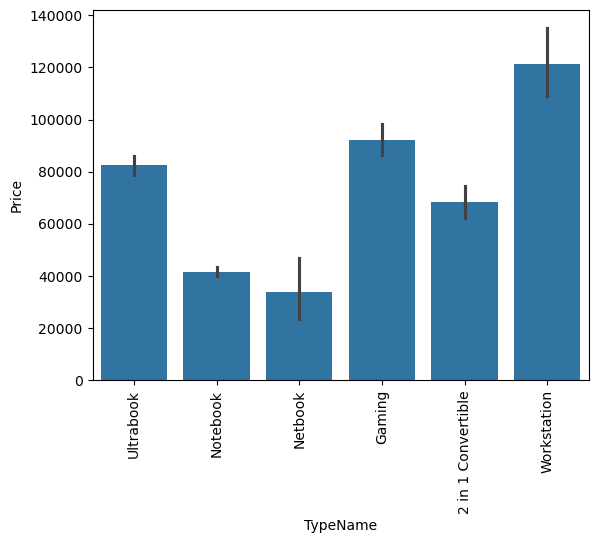

In [21]:
sns.barplot(x = df["TypeName"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

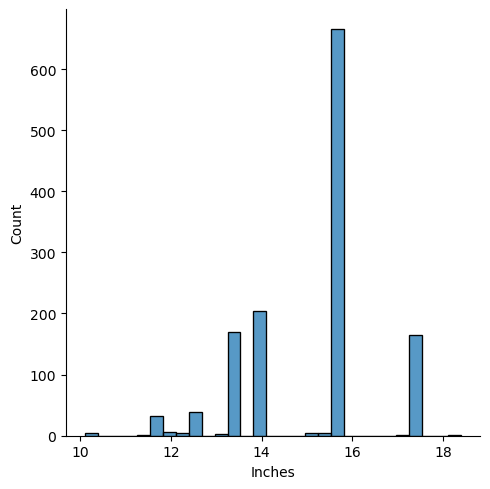

In [22]:
sns.displot(df["Inches"])

In [23]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

The resolution of the laptop is consistent in each of the rows.

Also, whether or not a laptop is touchscreen OR has IPS Panel can also be seen from this column.

In [26]:
# creating a new feature (feature engineering) if the laptop is touchscreen or not
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0)

In [27]:
df["Touchscreen"].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

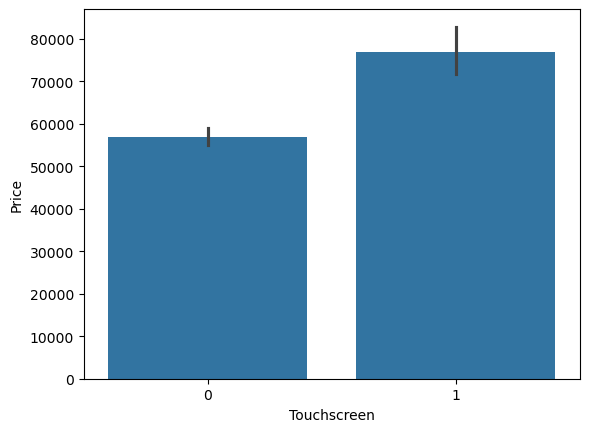

In [28]:
# looking at the price variation of touchscreen and non-touchscreen laptops
sns.barplot(x = df["Touchscreen"], y = df["Price"])

In [29]:
# creating a new feature (feature engineering) if the laptop has IPS Panel or not
df["IPS Panel"] = df["ScreenResolution"].apply(lambda x : 1 if "IPS Panel" in x else 0)

In [30]:
df["IPS Panel"].value_counts()

IPS Panel
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS Panel', ylabel='Price'>

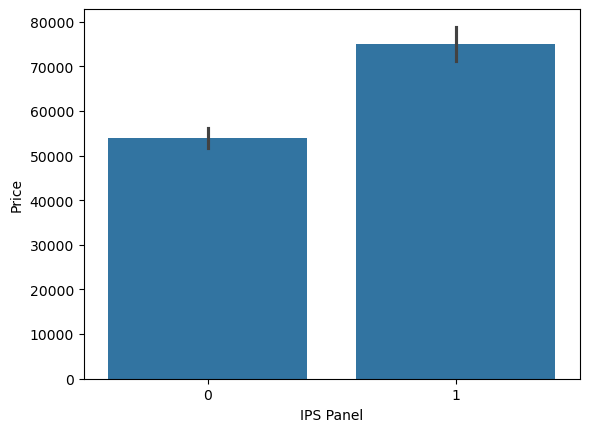

In [31]:
# looking at the price variation of laptops with/without IPS Panels
sns.barplot(x = df["IPS Panel"], y = df["Price"])

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


Now, our next target is to extract the resolution of the laptop (example, 2560x1600, etc.) from the "ScreenResolution" feature.

In [34]:
# Split the resolution part and extract X and Y values
df["X_res"] = df["ScreenResolution"].apply(lambda x: x.split()[-1].split('x')[0])
df["Y_res"] = df["ScreenResolution"].apply(lambda x: x.split()[-1].split('x')[1])

# Convert types to integers
df["X_res"] = df["X_res"].astype("int64")
df["Y_res"] = df["Y_res"].astype("int64")

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation of all numeric features with "Price"
price_corr = numeric_df.corr()['Price'].drop('Price')  # Drop self-correlation

In [38]:
price_corr

Inches         0.068197
Ram            0.743007
Weight         0.210370
Touchscreen    0.191226
IPS Panel      0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [39]:
# Instead of looking at X_resolution, Y_resolution and Inches, we club them into a single feature, Pixels Per Inches (ppi)
df["PPI"] = ((df["X_res"] ** 2 + df["Y_res"] ** 2) ** 0.5) / df["Inches"]

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [41]:
numeric_df = df.select_dtypes(include=['number'])
price_corr = numeric_df.corr()['Price'].drop('Price')
print(price_corr)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Touchscreen    0.191226
IPS Panel      0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64


In [42]:
df.drop(columns = ["ScreenResolution", "Inches", "X_res", "Y_res"], inplace = True)

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


Our next focus would be on Cpu column.


In [45]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [46]:
df["Cpu Name"] = df["Cpu"].apply(lambda x : " ".join(x.split()[0:3]))

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [48]:
# function to retrieve processer
def fetch_processor(text):
    if text == "Intel Core i3" or text == "Intel Core i5" or text == "Intel Core i7":
        return text
    elif text.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [49]:
df["CPU Brand"] = df["Cpu Name"].apply(fetch_processor)

In [50]:
df["CPU Brand"].value_counts()

CPU Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

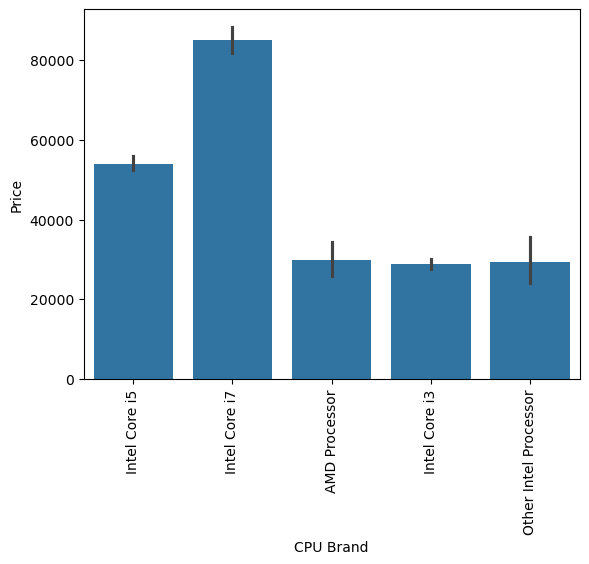

In [51]:
sns.barplot(x = df["CPU Brand"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,Cpu Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [53]:
df.drop(columns = ["Cpu", "Cpu Name"], inplace = True)

In [54]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

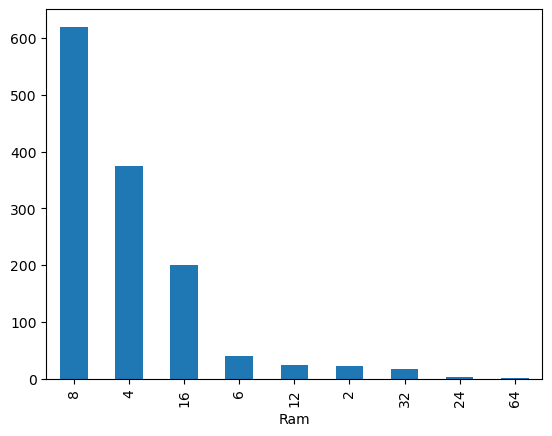

In [55]:
df["Ram"].value_counts().plot(kind = "bar")

<Axes: xlabel='Ram', ylabel='Price'>

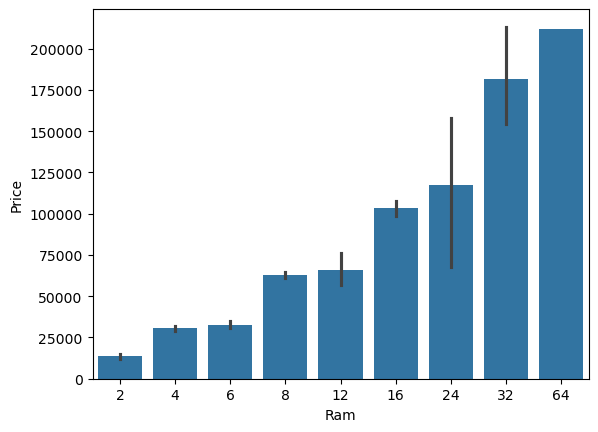

In [56]:
sns.barplot(x = df["Ram"], y = df["Price"])

In [57]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

We will create 4 different columns from this - HDD, SSD, Flash Storage, Hybrid.

In [59]:
# Helper function to extract numeric values (handles GB and TB)
def extract_value(part):
    if 'TB' in part:
        return float(part.split('TB')[0].strip()) * 1000  # Convert TB to GB
    elif 'GB' in part:
        return float(part.split('GB')[0].strip())  # Extract GB
    return 0

In [60]:
# Function to extract storage sizes
def extract_memory(memory):
    hdd, ssd, hybrid, flash = 0, 0, 0, 0
    
    for part in memory.split('+'):  # Split the components
        part = part.strip()
        
        if 'HDD' in part:
            hdd = extract_value(part)
        elif 'SSD' in part:
            ssd = extract_value(part)
        elif 'Hybrid' in part:
            hybrid = extract_value(part)
        elif 'Flash Storage' in part:
            flash = extract_value(part)
    
    return pd.Series([hdd, ssd, hybrid, flash])

In [61]:
# Apply the function and create new columns
df[['HDD', 'SSD', 'Hybrid', 'Flash_Storage']] = df['Memory'].apply(extract_memory)

In [62]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
681,Asus,Notebook,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.86,22324.3200,0,0,100.454670,Other Intel Processor,0.0,128.0,0.0,0.0
396,Lenovo,Notebook,8,256GB SSD,AMD Radeon RX 550,Windows 10,2.10,65510.9568,0,1,141.211998,Intel Core i7,0.0,256.0,0.0,0.0
300,Asus,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204,Intel Core i3,0.0,128.0,0.0,0.0
1168,HP,Notebook,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44,13266.7200,0,0,111.935204,Other Intel Processor,0.0,0.0,0.0,32.0
724,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0,127.335675,Intel Core i7,1000.0,128.0,0.0,0.0


In [63]:
# Now, drop the memory column
df.drop(columns = ["Memory"], inplace = True)

In [64]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0


In [65]:
# Let's check the correlation on price
numeric_df = df.select_dtypes(include=['number'])
price_corr = numeric_df.corr()['Price'].drop('Price')
print(price_corr)

Ram              0.743007
Weight           0.210370
Touchscreen      0.191226
IPS Panel        0.252208
PPI              0.473487
HDD             -0.095672
SSD              0.676250
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [66]:
# As there is very ledd correlation on Hybrid and Flash_Storage, we'll drop them (you can drop HDD too, check model performance, if on dropping it improves, then drop it also)
df.drop(columns = ["Hybrid", "Flash_Storage"], inplace = True)

In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0


Now, let's work on the Gpu column.

In [69]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

We'll extract brand name of the GPUs.

In [71]:
df["GPU Brand"] = df["Gpu"].apply(lambda x : x.split()[0])
df.drop(columns = ["Gpu"], inplace = True)

In [72]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


In [73]:
df["GPU Brand"].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [74]:
## Notice that ARM GPU is just a single laptop, we can drop this row
df = df[df["GPU Brand"] != "ARM"]

In [75]:
df.shape # dropped the laptop with "ARM" GPU

(1302, 13)

<Axes: xlabel='GPU Brand', ylabel='Price'>

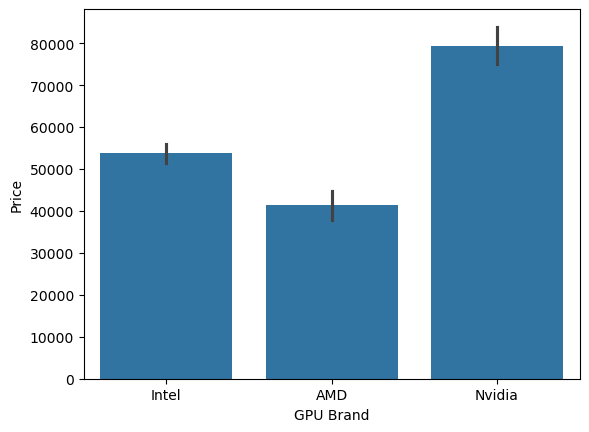

In [76]:
sns.barplot(x = df["GPU Brand"], y = df["Price"])

Now, let's go to OpSys feature.

In [78]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

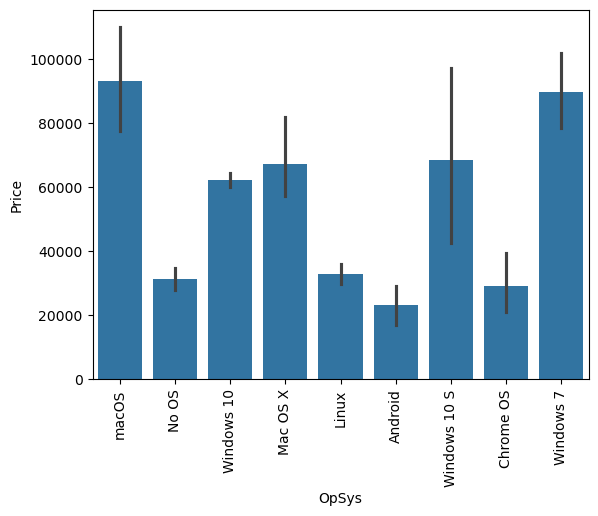

In [79]:
sns.barplot(x = df["OpSys"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

Windows 10, Windows 10 S, Windows 7 can be clubbed in one single feature - Windows


Mac OS X, macOS in one single feature - Mac


Others in one single feature - Other OS (No OS / Android / Linux)

In [83]:
# function to categorize operating systems
def cat_OS(text):
    if text == "Windows 10" or text == "Windows 10 S" or text == "Windows 7":
        return "Windows"
    elif text == "macOS" or text == "Mac OS X":
        return "Mac"
    else:
        return "No OS/Linux/Others"

In [84]:
df["OS"] = df["OpSys"].apply(cat_OS)
df.drop(columns = ["OpSys"], inplace = True)

In [85]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


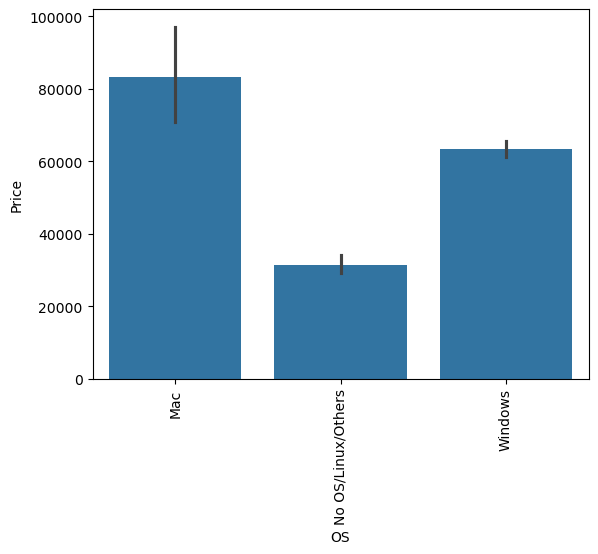

In [86]:
sns.barplot(x = df["OS"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

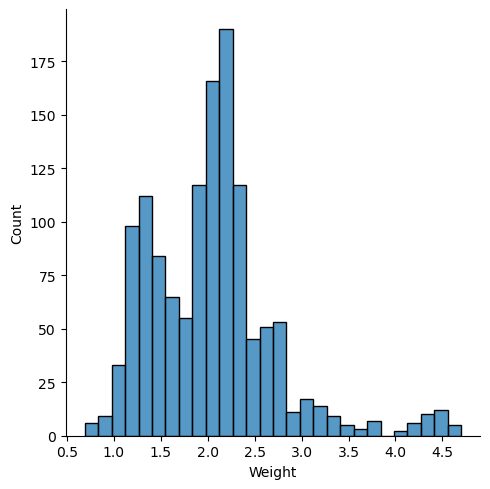

In [87]:
sns.displot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

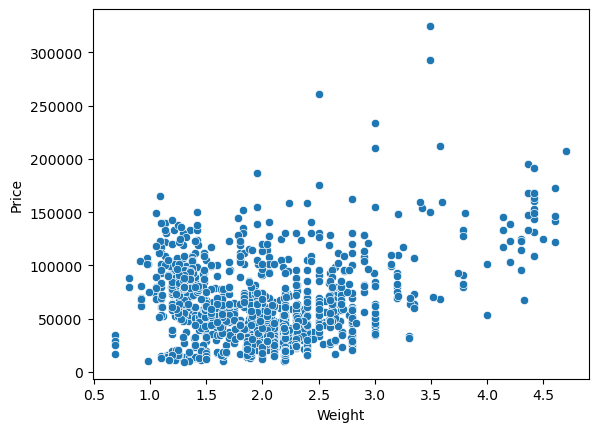

In [88]:
sns.scatterplot(x = df["Weight"], y = df["Price"])

In [89]:
# Let's check the entire correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,Ram,Weight,Price,Touchscreen,IPS Panel,PPI,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.097399,0.603194
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.515632,-0.063326
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096122,0.676113
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208805,0.257498
IPS Panel,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.092953,0.229800
PPI,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.295441,0.515879
HDD,0.097399,0.515632,-0.096122,-0.208805,-0.092953,-0.295441,1.000000,-0.400524
SSD,0.603194,-0.063326,0.676113,0.257498,0.229800,0.515879,-0.400524,1.000000


<Axes: >

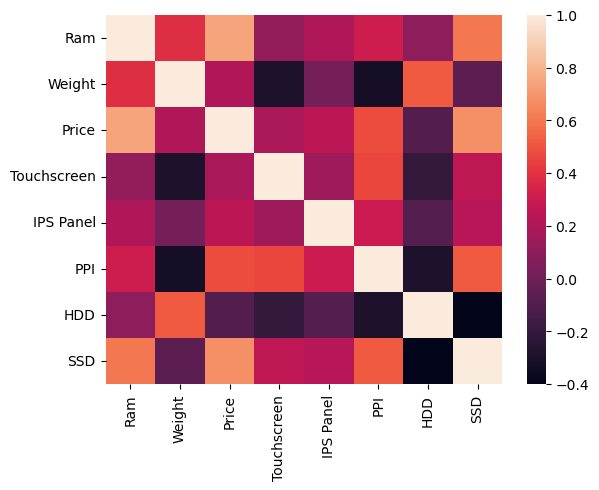

In [90]:
sns.heatmap(corr_matrix)

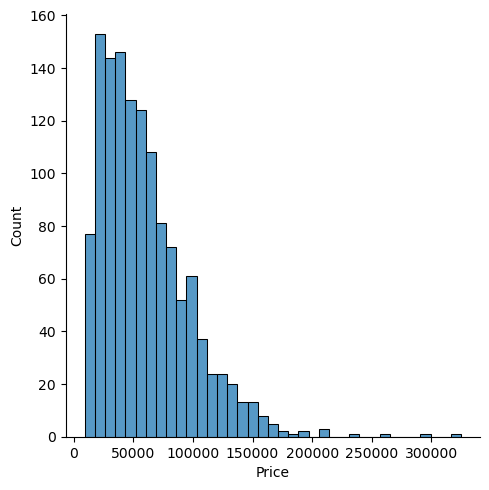

In [91]:
sns.displot(df["Price"])

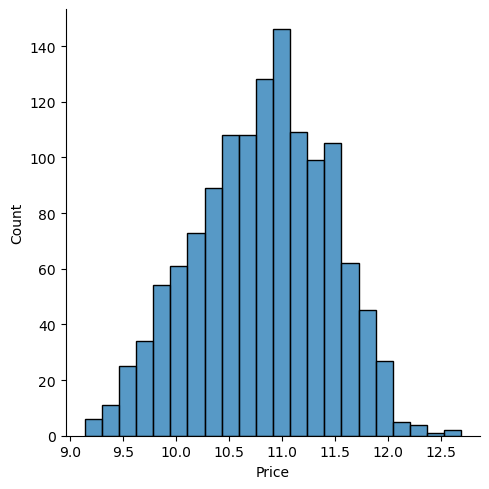

In [92]:
# The target, i.e. Price is skewed to the left which may cause problems to the ML algorithms.
# We can apply log transformation to this.
sns.displot(np.log(df["Price"]))

In [93]:
# the input features
X = df.drop(columns = ["Price"])
# the target label
y = np.log(df["Price"]) # log-transofrmation applied so that the distribution is not skewed

In [94]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [95]:
y.head() 

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

These are actually log of the prices (as we applied log-transformation). So, to report actual price, we will take exponential (antilog) so as to display the actual price.

## Train-test splitting

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
147,Asus,Notebook,4,2.00,0,0,141.211998,Other Intel Processor,1000.0,0.0,Intel,Windows
342,HP,Notebook,8,2.10,0,1,141.211998,Intel Core i3,1000.0,0.0,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,500.0,0.0,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,0.0,256.0,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,165.632118,Intel Core i7,0.0,256.0,Intel,Windows


We need to apply one-hot encoding on all the categorical variables (Company, TypeName, CPU Brand and OS).

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [194]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [196]:
# 1:03:21 - best scikit learn regression algorithms
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac


## Linear Regression

In [199]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = LinearRegression()

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8071895110330072
MAE 0.2149799711030501


In [200]:
np.exp(0.2149799711030501)

1.2398370641485832

## Ridge Regression

In [204]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = Ridge(alpha = 10)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8007065898895913
MAE 0.21989605611785026


## Lasso Regression

In [207]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = Lasso(alpha = 0.001)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8047189734357972
MAE 0.21729677601992822


# KNN

In [210]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = KNeighborsRegressor(n_neighbors = 4)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.7628311830058498
MAE 0.23167987305522827


## Decision Tree

In [213]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = DecisionTreeRegressor(max_depth = 8)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8378620737721244
MAE 0.19210418613553196


## SVR

In [216]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = SVR(kernel = "rbf", C = 10000, epsilon = 0.1)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8217905779437551
MAE 0.19750824779856435


## Random Forest

In [254]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = RandomForestRegressor(n_estimators = 100,
                             random_state = 3,
                             max_samples = 0.5,
                             max_features = 0.75,
                             max_depth = 15)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8624950107207603
MAE 0.17569511909349061


## Gradient Boost

In [250]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = GradientBoostingRegressor(n_estimators = 500)

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8767779508960052
MAE 0.16603051192666934


## XG Boost

In [242]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

step2 = XGBRegressor(random_state = 42)

# Hyper-parameter tuning
pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

# fit the RandomizedSearchCV
pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.893764824269168
MAE 0.15046624733746178


## Voting Regressor

In [180]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse_output = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder = "passthrough")

rf = RandomForestRegressor(n_estimators = 350, random_state = 3, max_samples = 0.5, max_features = 0.75, max_depth = 15)
gbt = GradientBoostingRegressor(n_estimators = 100, max_features = 0.5)
xgb = XGBRegressor(n_estimators = 25, learning_rate = 0.3, max_depth = 5)

step2 = VotingRegressor([("rf", rf), ("gbt", gbt), ("xgb", xgb)], weights = [5, 1, 1])

pipe_line = Pipeline([
    ("step1", step1),
    ("step2", step2)  
])

pipe_line.fit(X_train, y_train)

y_pred = pipe_line.predict(X_test)

print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8683095549754072
MAE 0.17403562692028746


## Exporting the Model

In [256]:
import pickle

pickle.dump(df, open("df.pkl", "wb"))
pickle.dump(pipe_line, open("pipe.pkl", "wb"))